In [1]:
import hepytorch as hep
import logging
# logging config showing time level message, name of the logger, and line number of the log message
logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",
    style="%",
    datefmt="%Y-%m-%d %H:%M:%S",
    level=logging.INFO,
)

myHEP = hep.HEPTorch('./recipes/mass_estimator_rescnn.json')

2024-11-17 06:30:31 - INFO - hepytorch - Using cpu device
2024-11-17 06:30:31 - INFO - hepytorch - Using the following configuration
{
  "data": {
    "name": "CSVLoader",
    "kwargs": {
      "path": "./data/toymc/ttbar_1_30ll_test.csv",
      "format": "csv"
    }
  },
  "preprocessor": {
    "name": "ObservablesPreprocessor",
    "kwargs": {}
  },
  "model": {
    "name": "ResidualCNN",
    "kwargs": {
      "input_features": 20,
      "hidden_features": 31,
      "output_features": 1
    }
  },
  "loss_fn": {
    "name": "MSELoss",
    "kwargs": {}
  },
  "optimizer": {
    "name": "SGD",
    "kwargs": {
      "learning_rate": 1e-05,
      "momentum": 0.9
    }
  },
  "trainer": {
    "name": "BasicTrainer",
    "kwargs": {
      "epochs": 5,
      "batch_size": 20
    }
  }
}
2024-11-17 06:30:32 - INFO - hepytorch - Data shape after preprocessing: torch.Size([25835, 20])
/Users/i550012/study/heptopics/hepytorch/hepytorch/preprocessors/observables.py:52: UserWarning: The given Num

In [2]:
result = myHEP.train()

Epoch 0, loss: 78.20691378732727
Epoch 1, loss: 0.38820246681960335
Epoch 2, loss: 0.38702325438631785
Epoch 3, loss: 0.38501994869730705
Epoch 4, loss: 0.3858100072532829


In [5]:
import matplotlib.pyplot as plt
top_mass = myHEP.model(myHEP.data).detach().numpy()
true_mass = myHEP.target.detach().numpy()
print(top_mass)

[[172.05087]
 [172.05087]
 [172.05087]
 ...
 [172.05087]
 [172.05087]
 [172.05087]]


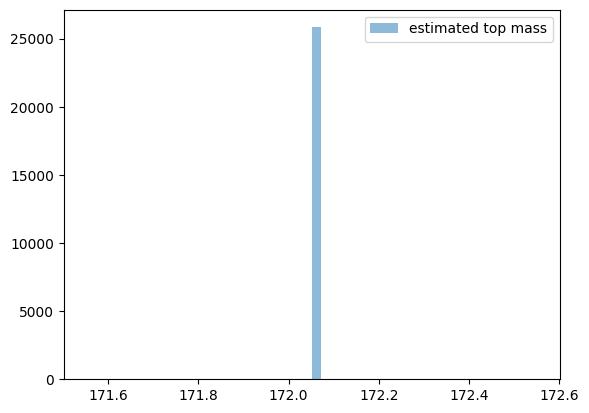

In [6]:
# draw two histograms of top_mass and true_mass
plt.hist(top_mass, bins=50, alpha=0.5, label='estimated top mass')
#plt.hist(true_mass, bins=50, alpha=0.5, label='true_mass')
plt.legend(loc='upper right')
plt.show()